#  Predicting Flight Price

In [5]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
data =pd.read_excel('Flight_Fare.xlsx')

In [34]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [11]:
data.shape

(10683, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [22]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [4]:
data['Route'].isnull().sum()

np.int64(1)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Exploratory data analysis

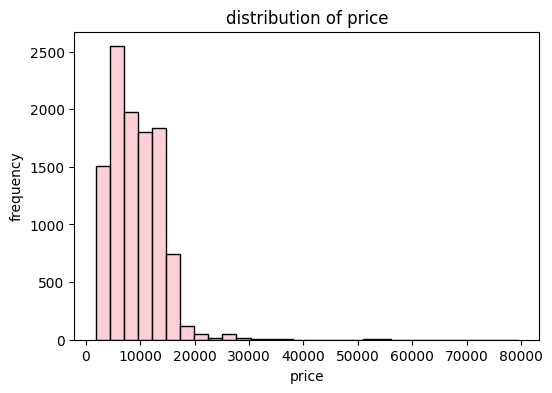

In [11]:
# Distribution of target class
plt.figure(figsize =(6,4))
sns.histplot(data['Price'] ,bins =30, color ='pink',edgecolor ='black')
plt.title("distribution of price")
plt.xlabel("price")
plt.ylabel("frequency")
plt.grid(False)
plt.show()

####    --- As here the price histogram shows that most flight fares lie between 4,000 and 20,000, with the highest concentration of bookings in the 8,000–15,000 range. This indicates that travelers mostly prefer mid-range priced flights over very cheap or very expensive options.

C:\Users\User\AppData\Local\Temp\ipykernel_19252\3131454174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =data['Airline'], palette ='hls')


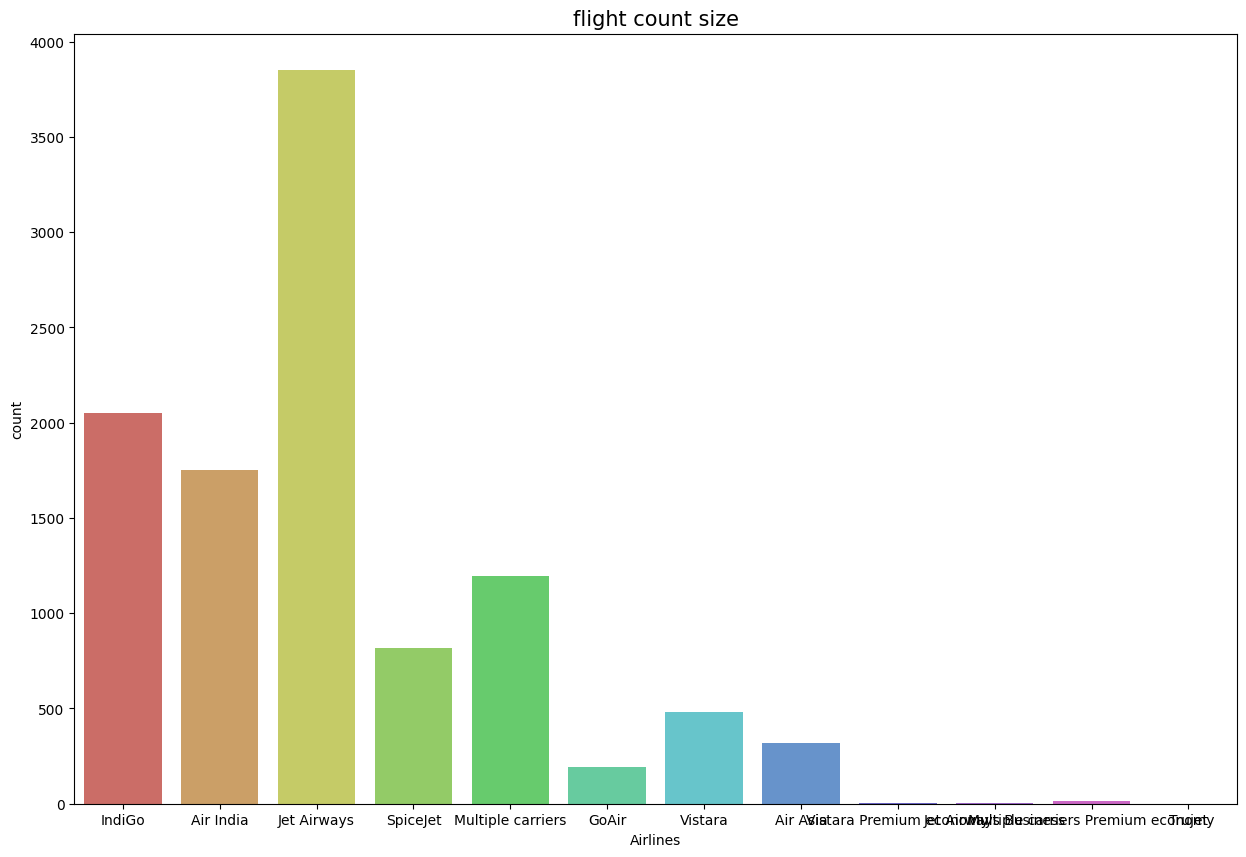

In [24]:
# Airlines distribution
plt.figure(figsize =(15,10))
sns.countplot(x =data['Airline'], palette ='hls')
plt.title("flight count size" , fontsize =15)
plt.xlabel("Airlines")
plt.ylabel("count")
plt.show()

####       ---As we can see here Jet airways is taking more flights rather than others following Indigo and Air india are second more used flight airlines

In [8]:
# Date of journey vs price
# first its need to extractt  month, day from date of journey
data['Date_of_Journey'] =pd.to_datetime(data['Date_of_Journey'])
data['journey_day'] =data['Date_of_Journey'].dt.day
data['journey_month'] =data['Date_of_Journey'].dt.month
data['journey_weekday'] =data['Date_of_Journey'].dt.day_name()

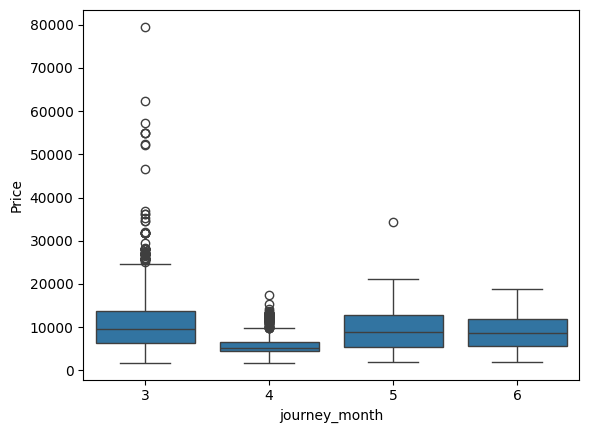

In [29]:
# month vs price
sns.boxplot(x ='journey_month', y ='Price', data =data)
plt.show()

###### ---Price variation across months suggests seasonal demand patterns, where certain months show higher typical fares than others.

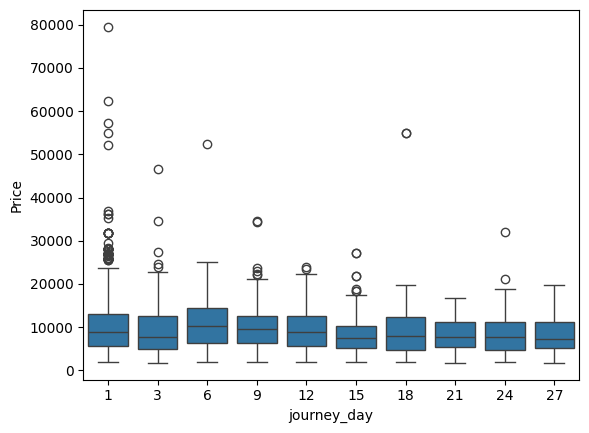

In [30]:
# day vs price
sns.boxplot(x ='journey_day' , y ='Price', data =data)
plt.show()

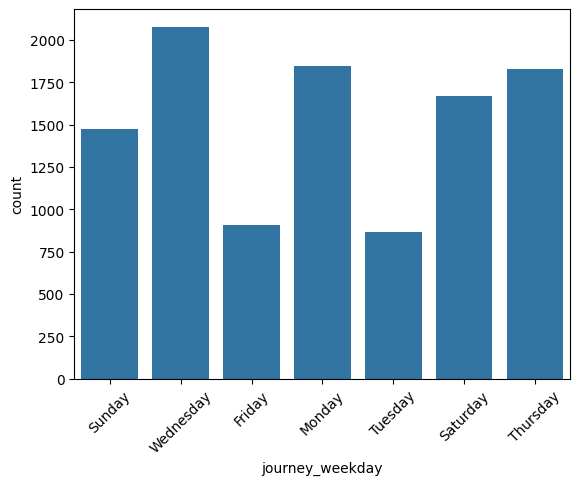

In [32]:
# weekday vs price
sns.countplot(x ='journey_weekday', data =data)
plt.xticks(rotation =45)
plt.show()

#####      Travel frequency is higher on wednesday, thursday and monday, indicating preferred travel days and possible business travel trends.

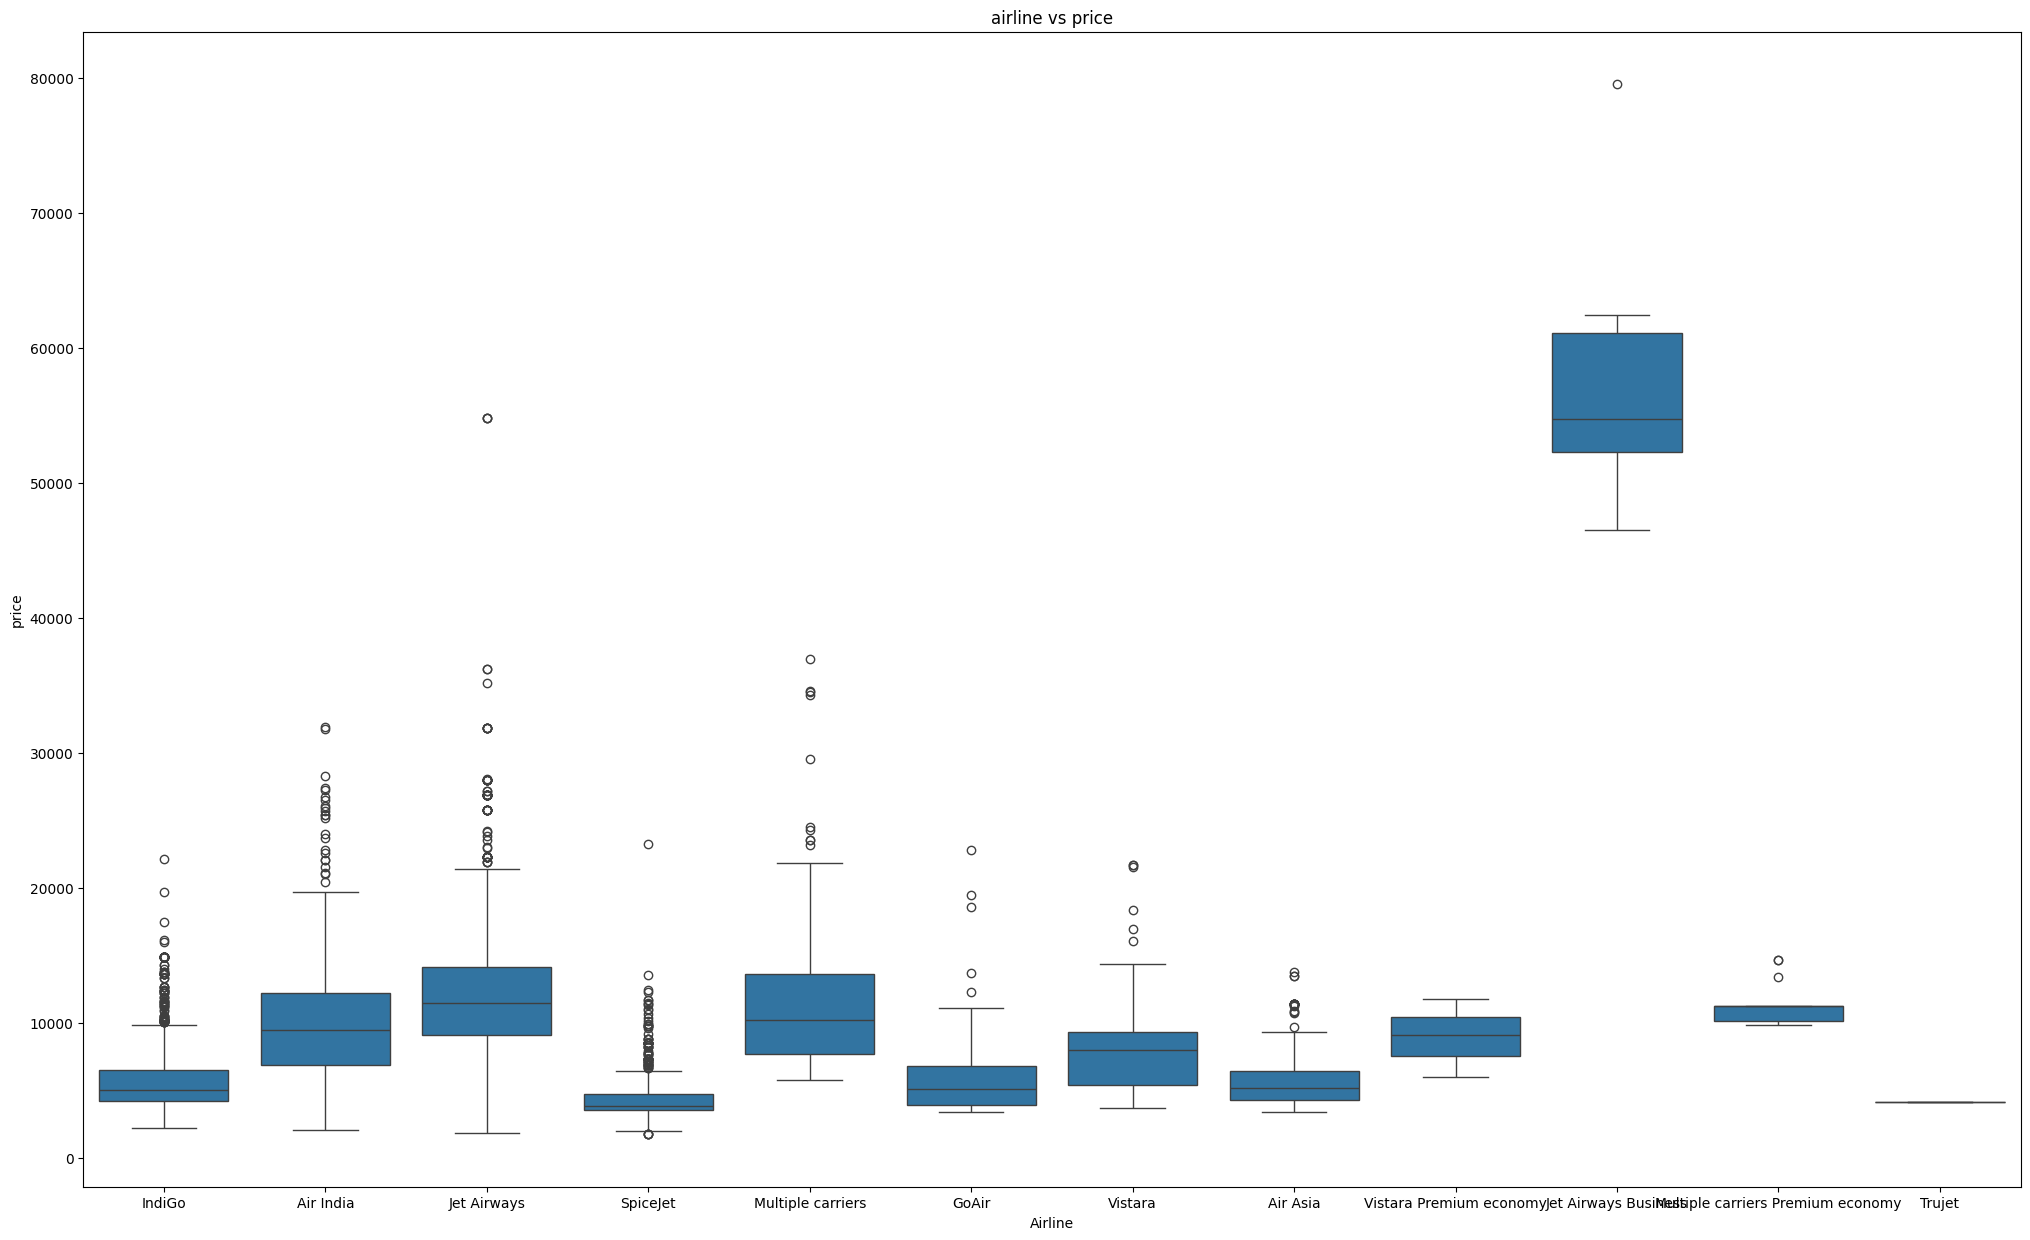

In [36]:
# distribution of airline vs price
plt.figure(figsize=(25,15))
sns.boxplot(x ='Airline' ,y ='Price' , data =data)
plt.title("airline vs price")
plt.xlabel("Airline")
plt.ylabel("price")
plt.show()

######      This plot shows that most airlines have a median fare around the mid-price range, but there is a wide spread in ticket prices across carriers like Air India,Jet airways and so on.These airlines display several high-price outliers, indicating that while many tickets are sold at moderate fares, some flights are priced significantly higher due to factors such as route distance, booking time, demand, or service class. The presence of multiple outliers suggests dynamic pricing behavior rather than fixed fare structures across airlines.

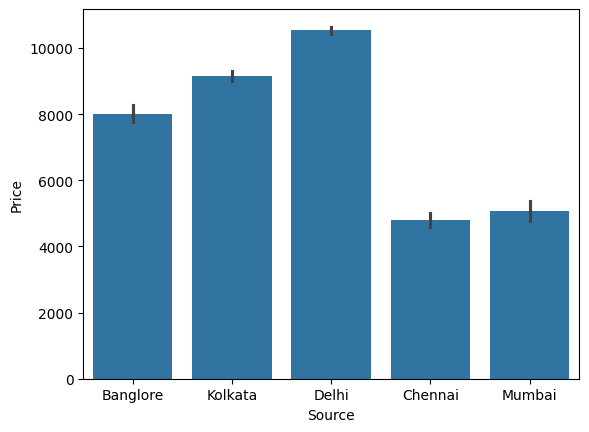

In [40]:
# Source vs price
sns.barplot(x ='Source' ,y ='Price', data =data)
plt.show()

#####       The bar graph shows that flights from Delhi have the highest average ticket price among all source cities. This indicates stronger demand or longer-distance routes starting from Delhi following Banglore and Kolkata.

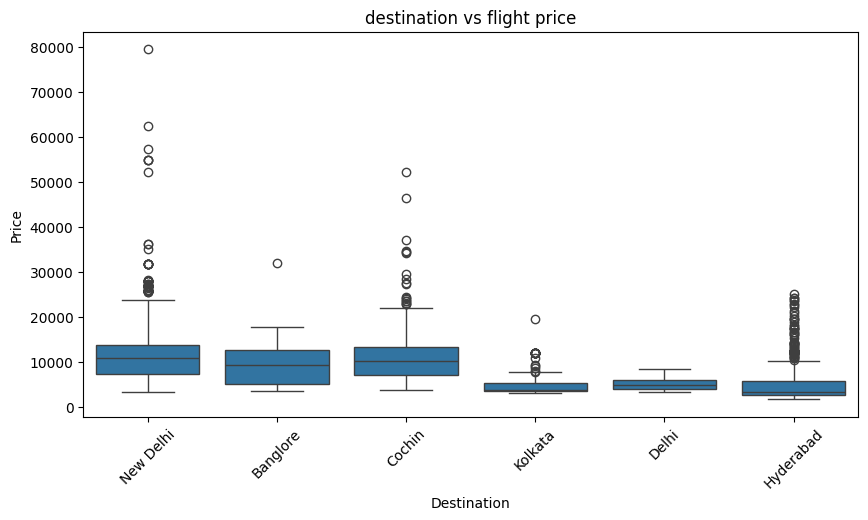

In [3]:
# destination  vs price
plt.figure(figsize =(10,5))
sns.boxplot(x ='Destination', y ='Price', data =data)
plt.xticks(rotation =45)
plt.title("destination vs flight price")
plt.show()

####     New Delhi, Kochi bound flights show a wide regular fare range along with several extreme high-price outliers, indicating strong demand-driven and time-sensitive pricing behavior. Banglore ,Delhi ,Kolkata and Hyderabad shows moderate fare range this indicates controlled price variation.



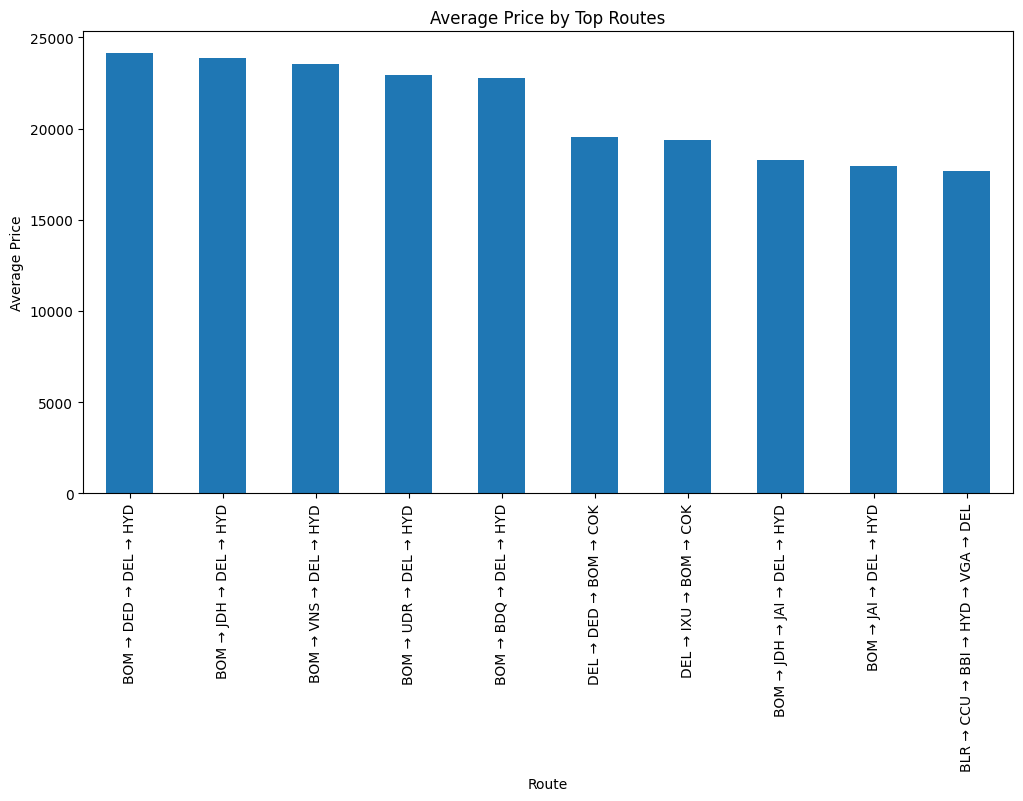

In [8]:
# Route vs price
# grouping the route with price average on top 10 routes as it is tough to read
route_price = data.groupby('Route')['Price'].mean().sort_values(ascending=False).head(10)

route_price.plot(kind='bar', figsize=(12,6))
plt.title("Average Price by Top Routes")
plt.ylabel("Average Price")
plt.show()


######    As we can see the route 1 having the higher price following others.

In [9]:
# subplots of departure time and arrival time with price 
# dep_time vs price
# extracting hour
data['Dep_hour'] =pd.to_datetime(data['Dep_Time']).dt.hour
data['Arrival_hour'] =pd.to_datetime(data['Arrival_Time']).dt.hour

# instead of exact time ,lets convert dep and arival time into groups

def time_slot(h):
    if h < 6:
        return "Early morning"
    elif h<12:
        return "morning"
    elif h < 18:
        return "afternoon"
    else:
        return "evening"

data['dep_slot'] =data['Dep_hour'].apply(time_slot)
data['arr_slot'] =data['Arrival_hour'].apply(time_slot)


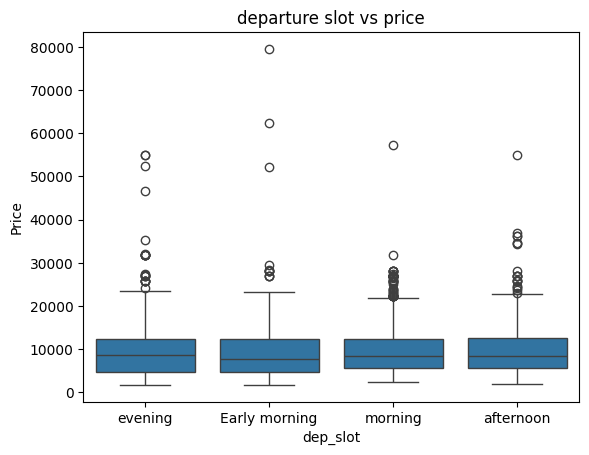

In [6]:
# plotting departure slot
sns.boxplot(x ='dep_slot', y ='Price', data =data)
plt.title("departure slot vs price")
plt.show()

#####    The median flight prices across departure time slots appear similar, indicating that typical fares do not vary much by time of day. Certain peak-hour or special flights are priced significantly higher despite similar average fare levels.


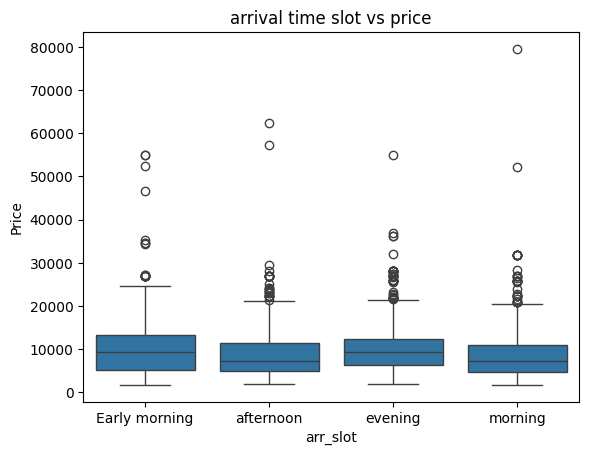

In [8]:
# plotting arrival slot
sns.boxplot(x ='arr_slot', y ='Price' ,data =data)
plt.title("arrival time slot vs price")
plt.show()

####    Arrival time categories show similar median fare levels, but  contain multiple high-value outliers, indicating that while most flights are priced in a similar range, a few late or peak-hour arrivals are significantly more expensive.

In [10]:
# Duration vs Price
# duration column is in"2 hr 50 min" so first convert it to numeric  minutes
def duration_to_min(x):
    parts = x.split()
    
    minutes = 0
    
    for p in parts:
        if 'h' in p:
            minutes += int(p.replace('h','')) * 60
        elif 'm' in p:
            minutes += int(p.replace('m',''))
            
    return minutes

data['Duration_min'] = data['Duration'].apply(duration_to_min)



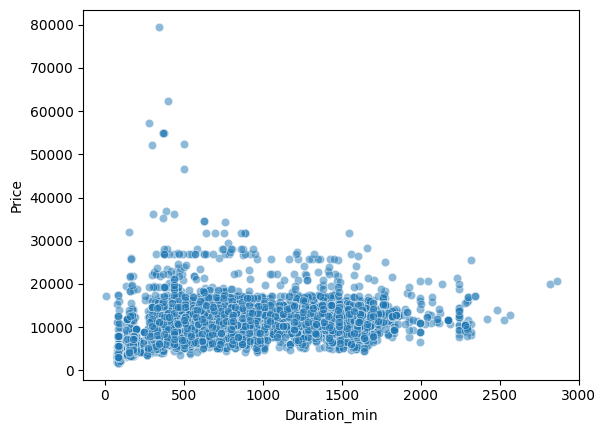

In [4]:
# duration_min vs price
sns.scatterplot(x='Duration_min', y='Price', data=data, alpha=0.5)
plt.show()


#####   Most flights are clustered in the lower to mid duration range, with prices concentrated in this region. Only a few long-duration flights show higher prices, indicating limited but costly extended routes.

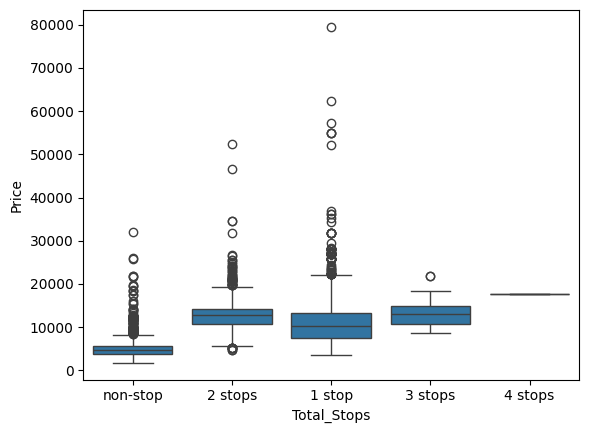

In [17]:
# stops vs Price
sns.boxplot(x ='Total_Stops', y ='Price', data =data)
plt.show()

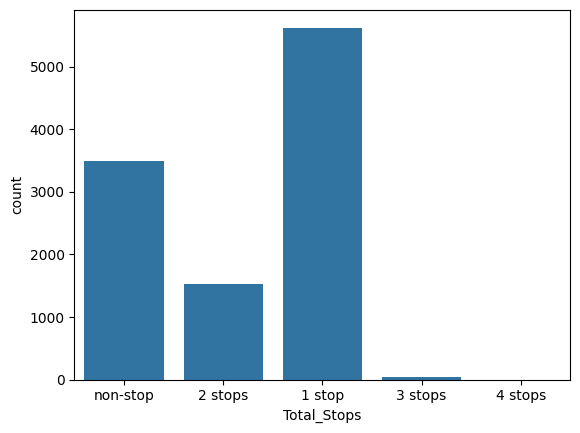

In [9]:
#stops count
sns.countplot(x ='Total_Stops', data =data)
plt.show()

######    1 stop showing high price variation  and non- stop have continous outliers . stop 4 is not reflecting means there is no flight,suggesting no such routes.

In [19]:
data['Additional_Info'].value_counts

<bound method IndexOpsMixin.value_counts of 0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object>

#####    ---The Additional_Info column contained only a single category (“No info”) across all records, providing no variation or predictive value, and was therefore this is plotted.

### EDA plots summary

In [ ]:
--- feature engineering

In [11]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
journey_day        0
journey_month      0
journey_weekday    0
Dep_hour           0
Arrival_hour       0
dep_slot           0
arr_slot           0
Duration_min       0
dtype: int64

In [12]:
# Handling null values
data['Route'].fillna(data['Route'].mode()[0],inplace =True)
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0],inplace =True)

In [21]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
journey_day        0
journey_month      0
journey_weekday    0
Dep_hour           0
Arrival_hour       0
dep_slot           0
arr_slot           0
Duration_min       0
dtype: int64

In [66]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_weekday,Dep_hour,Arrival_hour,dep_slot,arr_slot,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,22,1,evening,Early morning,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,5,13,Early morning,afternoon,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,9,4,morning,Early morning,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,18,23,evening,evening,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,16,21,afternoon,evening,285


####  --- As we have extracted features like dep_slot,arr_slot,duration-min,journey_day,journey_month,journey weekday, so lets remove the raw features as they store the same information in different manner to reduce redundancy and improving model learning

In [13]:
data.drop([
    'Date_of_Journey',
    'Duration',
    'Dep_Time',
    'Arrival_Time',
    'Additional_Info',
    'Route',
    'Arrival_hour',
    'Dep_hour'
], axis=1, inplace=True)


In [14]:
# replace mapping of total stop column
data['Total_Stops']  = data['Total_Stops'].replace({
                      'non-stop':0,
                    '1 stop':1,
                     '2 stops':2,
                     '3 stops':3,
                    '4 stops':4
})


In [22]:
data['Total_Stops'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Total_Stops, Length: 10683, dtype: float64>

In [69]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_weekday,dep_slot,arr_slot,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,Sunday,evening,Early morning,170
1,Air India,Kolkata,Banglore,2,7662,1,5,Wednesday,Early morning,afternoon,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,Sunday,morning,Early morning,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,Sunday,evening,evening,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,Friday,afternoon,evening,285


In [70]:
data['Total_Stops'].dtype

dtype('int64')

### Feature Encoding

In [71]:
data.select_dtypes(include='object').columns


Index(['Airline', 'Source', 'Destination', 'journey_weekday', 'dep_slot',
       'arr_slot'],
      dtype='object')

In [15]:
# encoding categorical columns
data =pd.get_dummies(data, drop_first =True)

In [73]:
data.head()

,Total_Stops,Price,journey_day,journey_month,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,journey_weekday_Sunday,journey_weekday_Thursday,journey_weekday_Tuesday,journey_weekday_Wednesday,dep_slot_afternoon,dep_slot_evening,dep_slot_morning,arr_slot_afternoon,arr_slot_evening,arr_slot_morning
0,0,3897,24,3,170,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
1,2,7662,1,5,445,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,2,13882,9,6,1140,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
3,1,6218,12,5,325,False,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
4,1,13302,1,3,285,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [16]:
# As the dummy column  are in boolean so lets convert it to int first
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)


In [75]:
data.head()

,Total_Stops,Price,journey_day,journey_month,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,journey_weekday_Sunday,journey_weekday_Thursday,journey_weekday_Tuesday,journey_weekday_Wednesday,dep_slot_afternoon,dep_slot_evening,dep_slot_morning,arr_slot_afternoon,arr_slot_evening,arr_slot_morning
0,0,3897,24,3,170,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,445,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,13882,9,6,1140,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,1,6218,12,5,325,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,1,13302,1,3,285,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


###  Model Creation

In [17]:
X =data.drop('Price', axis =1)
y =data['Price']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y , test_size =0.2, random_state =42)

#####   Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled  =scaler.transform(X_test)

## Linear Regression model


In [20]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()
LR.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# predicting train test data
train_pred = LR.predict(X_train_scaled)
test_pred = LR.predict(X_test_scaled)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("LINEAR REGRESSION RESULTS")
print("-------------------------")

print("Train MAE:", mean_absolute_error(y_train, train_pred))
print("Test  MAE:", mean_absolute_error(y_test, test_pred))

print("Train MSE:", mean_squared_error(y_train, train_pred))
print("Test  MSE:", mean_squared_error(y_test, test_pred))

print("Train R2 :", r2_score(y_train, train_pred))
print("Test  R2 :", r2_score(y_test, test_pred))


LINEAR REGRESSION RESULTS
-------------------------
Train MAE: 1942.808488867338
Test  MAE: 1991.4712122401766
Train MSE: 7669927.587281548
Test  MSE: 7794766.188894938
Train R2 : 0.6396823055213195
Test  R2 : 0.6316963385601845


In [85]:
print("MAE % of mean price:",
      mean_absolute_error(y_test, test_pred) / y_test.mean() * 100)


MAE % of mean price: 21.798070515059816


####  The Linear Regression baseline model showed consistent train and test performance with MAE around 1.8k and R² near 0.63, indicating good generalization without overfitting, but some underfitting due to limited model complexity.

In [24]:
#  applying L2(Ridge) Regularization
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='neg_mean_absolute_error'
)

ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_

ridge_pred = best_ridge.predict(X_test_scaled)

print("\nRIDGE RESULTS")
print("Best alpha:", ridge_grid.best_params_)
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("R2 :", r2_score(y_test, ridge_pred))


RIDGE RESULTS
Best alpha: {'alpha': 100}
MAE: 1984.0073571168261
MSE: 7810847.259801415
R2 : 0.6309365059813489


####    Linear Regression is used as a baseline model after feature engineering and scaling. The model produced an R² score of around 0.63 on both training and test sets, indicating stable performance but mild underfitting due to the nonlinear nature of flight fare data. Ridge (L2) regularization is applied to handle correlated encoded features and improve coefficient stability, but it did not significantly improve error metrics. This suggests that linear models are limited for this dataset, and more flexible nonlinear ensemble models are more suitable.

# Random Forest Regressor model

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}



In [26]:
rf =RandomForestRegressor(random_state =42)
rf_grid =GridSearchCV(estimator =rf, param_grid = rf_params, cv =3, n_jobs =-1, verbose =1, scoring ='neg_mean_absolute_error')


In [27]:
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [96]:

best_rf =rf_grid.best_estimator_
print("best rf parameter:", best_rf)

best rf parameter: RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                      random_state=42)


In [29]:
# predicting
rf_pred =rf_grid.predict(X_test)

In [31]:
# Evaluation 
print("\nRANDOM FOREST RESULTS")
print("---------------------")

print("MAE:", mean_absolute_error(y_test, rf_pred))
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R2 :", r2_score(y_test, rf_pred))



RANDOM FOREST RESULTS
---------------------
MAE: 1247.6430262651795
MSE: 4222962.789259033
R2 : 0.8004644886431549


###  Random Forest Regressor significantly outperformed linear and regularized regression models, achieving an R² score of 0.80 and reducing MAE to around 1248. This indicates that the model effectively captures nonlinear relationships between flight features and price.

# XGB MODEL

In [32]:
from xgboost import XGBRegressor
xgb =XGBRegressor(objective = 'reg:squarederror',random_state =42, n_jobs =-1)

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb_params ={
              'n_estimators':[300,500],
              'max_depth':[4,6,8],
              'learning_rate':[0.05,0.1,0.2],
              'subsample':[0.8,1.0],
              'colsample_bytree':[0.8,1.0],
            'gamma':[0,1]
}

In [34]:
xgb_random =RandomizedSearchCV(xgb,param_distributions =xgb_params,n_iter =10,scoring ='neg_mean_absolute_error',
                             cv =3, n_jobs =-1, verbose =1, random_state =42)

In [35]:
xgb_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1], 'learning_rate': [0.05, 0.1, ...], 'max_depth': [4, 6, ...], ...}"
,n_iter,10
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [111]:
best_xgb =xgb_random.best_estimator_
print("best xgb parameters:", best_xgb)

best xgb parameters: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)


In [36]:
xgb_pred =xgb_random.predict(X_test)
xgb_pred

array([12656.313 ,  5780.1885, 13073.074 , ...,  6266.9946,  4412.2505,
       13935.699 ], dtype=float32)

In [37]:
print("XGBOOST RESULTS")
print("----------------")

print("MAE:", mean_absolute_error(y_test, xgb_pred))
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("R2 :", r2_score(y_test, xgb_pred))


XGBOOST RESULTS
----------------
MAE: 1220.037841796875
MSE: 3565852.25
R2 : 0.8315130472183228


In [114]:
# importance of features
feat_imp = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).head(15)


Airline_Jet Airways Business    0.350359
Airline_Jet Airways             0.091430
Total_Stops                     0.082386
Airline_SpiceJet                0.061251
Destination_Delhi               0.048820
Airline_IndiGo                  0.038751
Source_Mumbai                   0.033478
Duration_min                    0.029608
Airline_Multiple carriers       0.028412
Source_Chennai                  0.021989
Destination_New Delhi           0.021755
journey_day                     0.017980
journey_month                   0.016592
Source_Delhi                    0.016519
Destination_Hyderabad           0.015500
dtype: float32

####   The XGBoost Regressor is trained using hyperparameter tuning with randomized search to optimize model performance. Compared to Linear Regression and Random Forest, XGBoost achieved better prediction accuracy by capturing complex nonlinear relationships between features such as airline, route, stops, duration, and travel time. The tuned model produced lower MAE and MSE values along with a higher R² score, indicating stronger explanatory power and reduced prediction error.

# Model Comparison Report

In [41]:
results = []

def add_result(name, y_true, y_pred):
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    })

add_result("Linear", y_test, test_pred)
add_result("Ridge", y_test, ridge_pred)
add_result("RandomForest", y_test, rf_pred)
add_result("XGBoost", y_test, xgb_pred)

import pandas as pd
pd.DataFrame(results).sort_values("R2", ascending=False)


,Model,MAE,MSE,R2
3,XGBoost,1220.037842,3.565852e+06,0.831513
2,RandomForest,1247.643026,4.222963e+06,0.800464
0,Linear,1991.471212,7.794766e+06,0.631696
1,Ridge,1984.007357,7.810847e+06,0.630937


####   Multiple regression models were trained on the processed flight fare dataset.Performance was evaluated using the test set to measure generalization.
####  Linear Regression model Used as the initial benchmark model.It assumes linear relationship between features and target price.Produced moderate R² (~0.63).Error values were relatively high compared to ensemble models.Similar train and test scores indicate stable but underfit behavior.
####  Conclusion: Too simple to capture complex fare pricing patterns.
####  Applied L2 regularization to reduce coefficient instability.Performance remained close to standard Linear Regression and no significant reduction in prediction error it helped control multicollinearity but did not improve fit quality.
####  Conclusion: Regularization improved stability but not predictive power.

#### Random Forest Regressor — Ensemble Model built multiple decision trees and averaged predictions captured nonlinear relationships between features.It reduced MAE significantly (~35–40% improvement over linear model) and R² improved to around 0.80.Showed strong generalization on test dataand its training time higher but acceptable.
####  Conclusion: Major performance improvement over linear models.

####  XGBoost Regressor — Boosting Model used gradient boosting with hyperparameter tuning.Sequential tree learning helped reduce residual errors and achieved the best overall accuracy among tested models.It showed lowest error metrics and highest R² score.The model handled feature interactions effectively.
####  Conclusion: Best performing model for this dataset.

#### Overall Findings
#####      Linear models underfit due to nonlinear pricing behavior.
#####      Regularization alone was not sufficient to improve results.
#####      Tree-based ensemble methods performed significantly better.
#####      Boosting approach provided the most accurate predictions.
#####      Model complexity matched dataset structure better than linear assumptions.


####   Among all tested models, tree-based ensemble methods performed significantly better than linear approaches. Random Forest reduced prediction error and improved variance explanation, confirming the presence of nonlinear relationships in the dataset. The tuned boosting model achieved the strongest performance overall, with the highest R² and lowest error values. Based on accuracy and generalization behavior, the boosting model was selected as the final prediction model.

# Report on challenges faced

#####   The first challenge was understanding which features were actually useful for predicting flight prices. The dataset had multiple time and route-related columns, and it was initially confusing whether to keep all of them or remove some to avoid redundancy.
#####   Handling categorical variables required several trials. Columns like airline, source, destination, and route needed encoding, and choosing the right encoding approach without creating too many unnecessary features took some experimentation.
#####   Feature engineering from date and time columns was another tricky part. Extracting journey day, month, departure hour, arrival hour, and duration in a usable numeric format required careful preprocessing and validation.
#####   Linear and regularized regression models showed underfitting, which indicated that the relationship between features and price was not purely linear. This required moving toward more advanced ensemble models.
#####   Hyperparameter tuning increased training time significantly, especially for Random Forest and boosting models. The parameter grid had to be reduced and randomized search was used to keep computation time reasonable.
#####   Comparing models fairly and interpreting metrics like MAE, MSE, and R² in practical terms took some time to understand properly.